<img src="https://spaceplace.nasa.gov/satellite/en/geostationary-orbit.en.gif" alt="From Earth, a geostationary satellite looks like it is always in the same place, because it moves in the same direction and at the same rate the Earth spins. Image credit: NASA Solar System Exploration"></img>

# Coordinate Types

---

## Overview

Great circles can use a diverse variety of different types of coordinates. This notebook will cover the different types of coordinates that are used when calculating great circles and how to convert between them. This notebook will also begin to show how to plot coordinates and their associated great circle arcs on a map of Earth.

1. Types of Coordinates
1. Convert Coordinates to All Coordinate Types
1. Plot Coordinates on a World Map

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Numpy](https://foundations.projectpythia.org/core/numpy/) | Necessary | Used to work with large arrays |
| [Pandas](https://foundations.projectpythia.org/core/pandas) | Necessary | Used to read in and organize data (in particular dataframes) |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy) | Helpful | Will be used for adding maps to plotting |
| [Matplotlib](https://foundations.projectpythia.org/core/matplotlib/) | Helpful | Will be used for plotting |

- **Time to learn**: 20 minutes

---

## Imports

In [1]:
import numpy as np                                     # working with degrees and radians
import pandas as pd                                    # working with data and dataframes

import matplotlib.pyplot as plt                        # plotting a graph
from cartopy import crs as ccrs, feature as cfeature   # plotting a world map

## Types of Coordinates

### Geodetic Coordinates

[Geodetic coordinates](https://en.wikipedia.org/wiki/Geodetic_coordinates) are latitude and longtiude and are measured from -90° South to 90° North and -180° East to 180° West measured from Greenwich. Geodetic coordinates also include a geodetic height, which on Earth represents the radius of the planet.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/FedStats_Lat_long.svg/1024px-FedStats_Lat_long.svg.png" alt="Longitude lines are perpendicular to and latitude lines are parallel to the Equator from Wikipedia" width=400 />
</p>

0 degrees latitude represents the middle of Earth at the equator while 0 degrees longitude was arbitrarily chosen to lie in the Royal Observatory in Greenwich (in London, England). This is known as the [Prime Meridian](https://en.wikipedia.org/wiki/Prime_meridian) and due to its arbitrary definition the location of the Prime Meridian have varied throughout history.

### Cartesian Coordinates

[Cartesian coordinates](https://en.wikipedia.org/wiki/Cartesian_coordinate_system) describe points in space based on perpendicular axis lines that meet at a single point of origin, where any point's position is described based on the distance to the origin along xyz axis.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Coord_system_CA_0.svg/1024px-Coord_system_CA_0.svg.png" alt="A three dimensional Cartesian coordinate system, with origin O and axis lines X, Y and Z, oriented as shown by the arrows. The tick marks on the axes are one length unit apart. The black dot shows the point with coordinates x = 2, y = 3, and z = 4, or (2, 3, 4) from Wikipedia" width=400 />
</p>

Image Source: [Three Dimensional Cartesian Coordinate System](https://en.wikipedia.org/wiki/Cartesian_coordinate_system)

#### How to Convert from Geodetic to Cartesian Coordinates

Assuming the Earth's radius is 6378137 meters then:

$$x = radius * cos(latitude) * cos(longitude)$$
$$y = radius * cos(latitude) * sin(longitude)$$
$$z = radius * sin(latitude)$$

However, on a unit sphere, we can consider the radius to be 1.

In [2]:
def cartesian_coordinates(latitude=None, longitude=None):
    radius = 1
    latitude = np.deg2rad(latitude)
    longitude = np.deg2rad(longitude)
    cart_x = radius * np.cos(latitude) * np.cos(longitude)
    cart_y = radius * np.cos(latitude) * np.sin(longitude)
    cart_z = radius * np.sin(latitude)
    return cart_x, cart_y, cart_z

### Spherical Coordinates

[Spherical coordinates](https://en.wikipedia.org/wiki/Spherical_coordinate_system) describe points in space based on three values: radial distance (rho, r) along the radial line between point and the origin, polar angle (theta, θ) between the radial line and the polar axis, and azimuth angle (phi, φ) which is the angle of rotation of the radial line around the polar axis. With a fixed radius, the 3-point coordinates (r, θ, φ) provide a coordinate along a sphere.

- Radial distance (r): distance from center to surface of sphere
- Polar angle (θ): angle between radial line and polar axis
- Azimuth angle (φ): angle around polar axis

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Sphericalcoordinates.svg/1024px-Sphericalcoordinates.svg.png" alt="Spherical Coordinate Description from Wikipedia" width=400 />
</p>

Image Source: [Wikipedia - Spherical Coordinate System](https://simple.wikipedia.org/wiki/Spherical_coordinate_system)

#### Convert from Cartesian to Spherical Coordinates

$$ρ^2 = x^2 + y^2 + z^2$$
$$tan(θ) = \frac{y}{x}$$
$$φ = arccos(\frac{x}{\sqrt{x^2 + y^2 + z^2}})$$

Where, rho (ρ), theta (θ), phi (φ):

$$ρ = \sqrt{x^2 + y^2 + z^2}$$
$$θ = arctan(\frac{y}{x})$$
$$φ = arccos(\frac{x}{ρ})$$

In [3]:
def cartesian_to_spherical_coordinates(cart_x=None, cart_y=None, cart_z=None):
    rho = np.sqrt(cart_x**2 + cart_y**2 + cart_z**2)
    theta = np.arctan(cart_y/cart_x)
    phi = np.arccos(cart_z / rho)
    return rho, theta, phi 

### Polar Coordinates

[Polar coordinates](https://en.wikipedia.org/wiki/Polar_coordinate_system) are a combination of latitude, longitude, and altitude from the center of the sphere (based on the radius).

#### Convert Geodetic to Polar Coordinates

Assuming the Earth's radius is 6378137 meters then:

$$x = cos(latitude) * cos(longitude) * radius$$
$$y = cos(latitude) * sin(longitude) * radius$$
$$z = sin(latitude) * radius$$

In [4]:
def polar_coordinates(latitude=None, longitude=None):
    earth_radius = 6378137  # meters
    latitude = np.deg2rad(latitude)
    longitude = np.deg2rad(longitude)
    polar_x = np.cos(latitude) * np.sin(longitude) * earth_radius
    polar_y = np.cos(latitude) * np.cos(longitude) * earth_radius
    polar_z = np.sin(latitude) * earth_radius
    return polar_x, polar_y, polar_z

## Convert City Coordinates to All Coordinate Types

This notebook contains a list of locations (`location_coords.txt`) ([see here](https://github.com/ProjectPythia/great-circle-cookbook/blob/main/notebooks/location_coords.txt)) with their associated latitude and longitude coordinates. We will use the functions defined above to convert latitude/longitude to all coordinate types and save the output to a new file (`location_full_coords.txt`). In the future, different functions will require different coordinates to complete their calculations, so it is useful to have all these coordinates values known in advance.

### Display Coordinates of Cities

First, we will read in the latitude and longitude coordinates from saved text file `location.txt` and save the details in a `pandas` dataframe:

In [5]:
location_df = pd.read_csv("../location_coords.txt")
location_df = location_df.rename(columns=lambda x: x.strip()) # strip excess white space from column names and values
location_df

,name,latitude,longitude
0,arecibo,18.3441,-66.7527
1,boulder,40.0150,-105.2705
2,boston,42.3601,-71.0589
3,redwoods,41.4017,-124.0417
4,houston,29.5518,-95.0982
5,greenwich,51.4934,0.0098
6,svalbard,77.8750,20.9752
7,mcmurdo,-77.5000,165.0000
8,cairo,30.0444,31.2357
9,johannesburg,-26.2056,28.0337


### Add Columns for Additional Coordinate Types

We will now add columns to the dataframe for each of the three additional coordinate types: cartesian, spherical, and polar. And finally, we will save the output to a new file we can reference in the future `location_full_coords.txt`.

In [6]:
location_df["cart_x"], location_df["cart_y"], location_df["cart_z"] = cartesian_coordinates(location_df["latitude"],
                                                                                            location_df["longitude"])
location_df["rho"], location_df["theta"], location_df["phi"] = cartesian_to_spherical_coordinates(location_df["cart_x"],
                                                                                                  location_df["cart_y"],
                                                                                                  location_df["cart_z"])
location_df["polar_x"], location_df["polar_y"], location_df["polar_z"] = polar_coordinates(location_df["latitude"],
                                                                                           location_df["longitude"])

location_df

,name,latitude,longitude,cart_x,cart_y,cart_z,rho,theta,phi,polar_x,polar_y,polar_z
0,arecibo,18.3441,-66.7527,0.374643,-0.872119,0.314723,1.0,-1.165054,1.250631,-5.562495e+06,2.389526e+06,2.007347e+06
1,boulder,40.0150,-105.2705,-0.201714,-0.738835,0.642988,1.0,1.304276,0.872403,-4.712394e+06,-1.286558e+06,4.101066e+06
2,boston,42.3601,-71.0589,0.239852,-0.698914,0.673788,1.0,-1.240212,0.831473,-4.457769e+06,1.529809e+06,4.297512e+06
3,redwoods,41.4017,-124.0417,-0.419898,-0.621549,0.661334,1.0,0.976657,0.848200,-3.964322e+06,-2.678169e+06,4.218080e+06
4,houston,29.5518,-95.0982,-0.077303,-0.866469,0.493210,1.0,1.481816,1.055020,-5.526456e+06,-4.930480e+05,3.145762e+06
5,greenwich,51.4934,0.0098,0.622605,0.000106,0.782536,1.0,0.000171,0.672067,6.792189e+02,3.971059e+06,4.991125e+06
6,svalbard,77.8750,20.9752,0.196127,0.075189,0.977692,1.0,0.366086,0.211621,4.795630e+05,1.250923e+06,6.235851e+06
7,mcmurdo,-77.5000,165.0000,-0.209065,0.056019,-0.976296,1.0,-0.261799,2.923426,3.572949e+05,-1.333443e+06,-6.226950e+06
8,cairo,30.0444,31.2357,0.740156,0.448885,0.500671,1.0,0.545166,1.046423,2.863050e+06,4.720816e+06,3.193348e+06
9,johannesburg,-26.2056,28.0337,0.791946,0.421683,-0.441594,1.0,0.489280,2.028170,2.689551e+06,5.051141e+06,-2.816544e+06


In [7]:
# Save Output to a New Text File
location_df.to_csv("../location_full_coords.txt", index=False)

## Plot Coordinates

Coordinates can be hard to visualize internally, so let's plot them on a world map of Earth. A common plotting tool in Python is `matplotlib`, but to include a world map we will also use `cartopy` which stores many different kinds of maps of Earth.

### World Map

To generate a full world map, we need the full range of longitude and latitude from -180 degrees to 180 degrees and -90 degrees to 90 degrees.
```
longitude east = 180

longitude west = -180

latitude north = 90

latitude south = -90
```

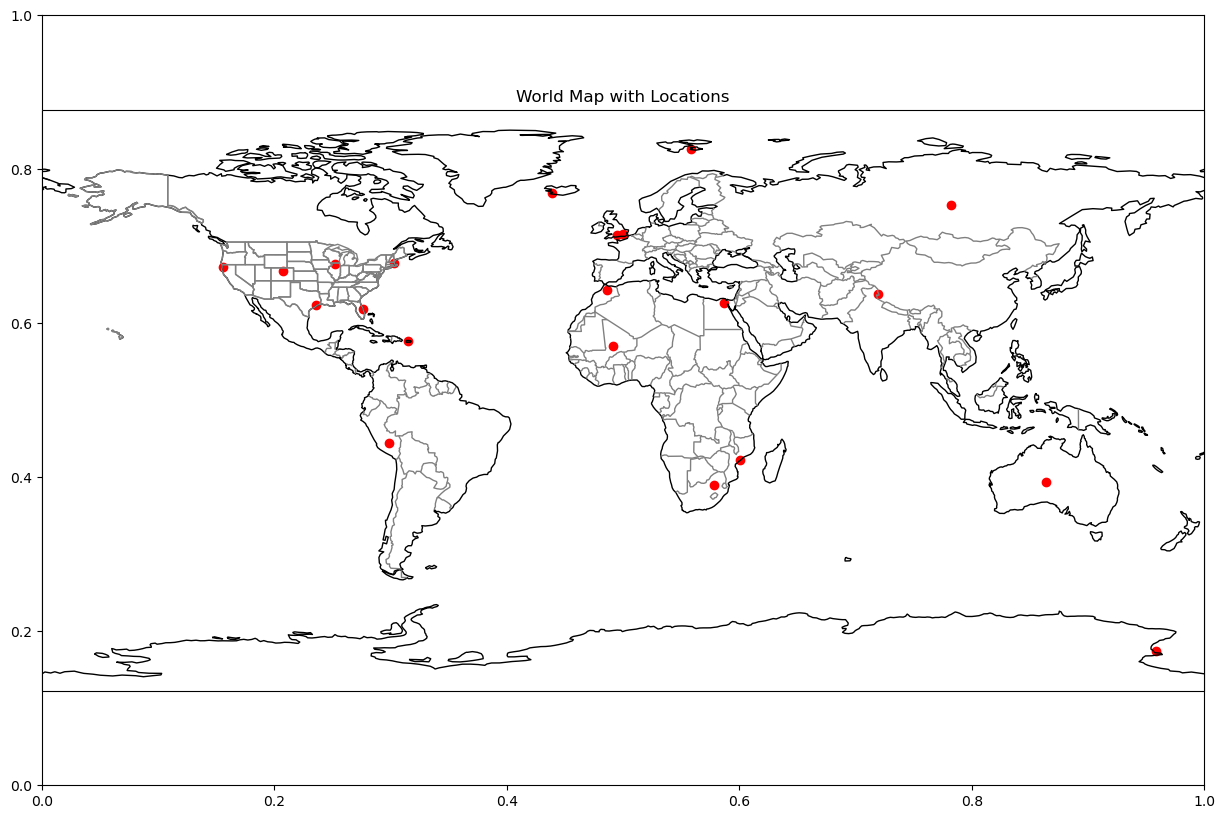

In [8]:
# Setup Matplotlib Plot Figure with a size of 15 by 10
fig = plt.subplots(figsize=(15, 10)) 

# Overlay a plot of the Plate Carree Projection of Earth (a flat map of the planet)
projection_map = ccrs.PlateCarree()
ax = plt.axes(projection=projection_map)

# Plot the full range of latitude/longitude
lon_west, lon_east, lat_south, lat_north = -180, 180, -90, 90
ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)

# Include the coastlines (in black) as well as the border of the continents and the states in the US (in grey)
ax.coastlines(color="black")
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor="grey")
    
# Plot each location on the map as a red dot
longitudes = location_df["longitude"] # longitude
latitudes = location_df["latitude"]   # latitude
plt.scatter(longitudes, latitudes, c="red")

# Set the title of the map and display
plt.title("World Map with Locations")
plt.show()

### United States Map

Sometimes you don't need to view the whole map, but a sub-section. For example, if we only wanted to view the US on a world map we would need a small range of latitude/longtiude coordinates

```
longitude east = -60

longitude west = -130

latitude north = 60

latitude south = 20
```

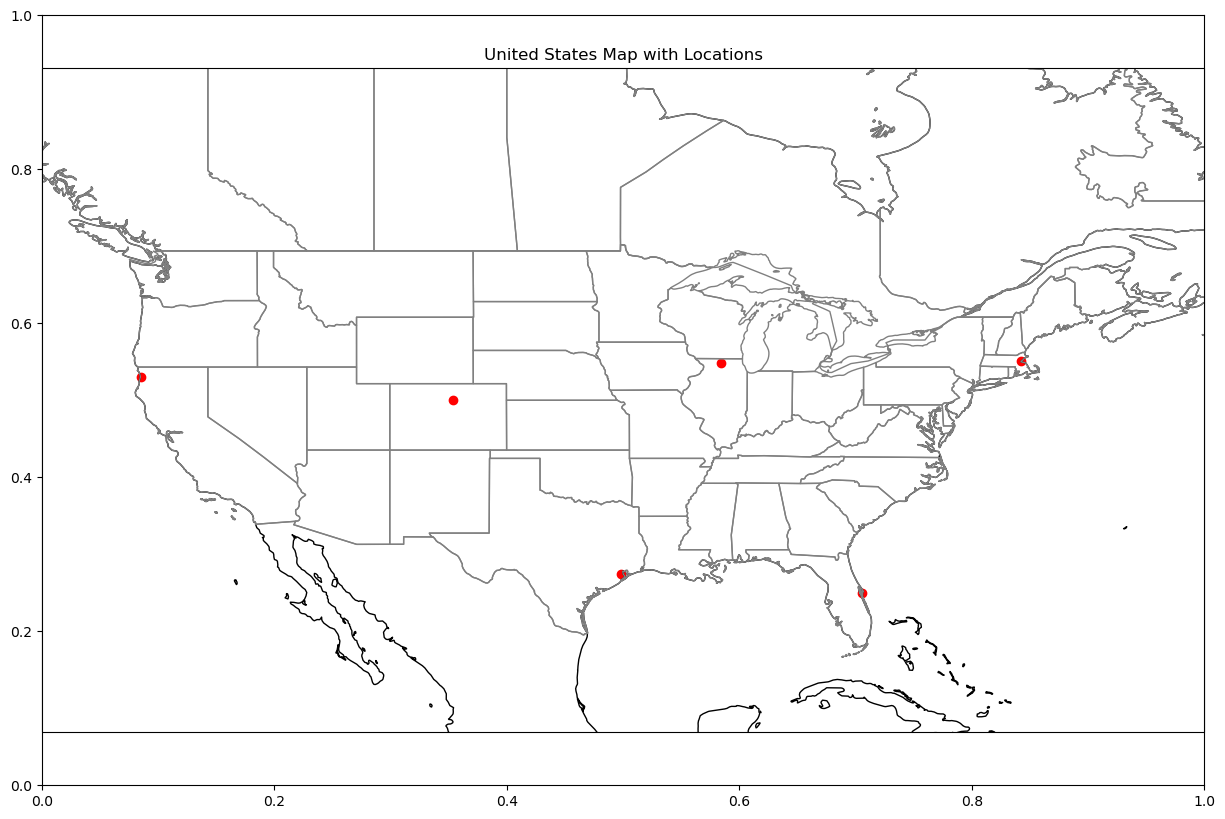

In [9]:
# Setup Matplotlib Plot Figure with a size of 15 by 10
fig = plt.subplots(figsize=(15, 10)) 

# Overlay a plot of the Plate Carree Projection of Earth (a flat map of the planet)
projection_map = ccrs.PlateCarree()
ax = plt.axes(projection=projection_map)

# Plot the a range of latitude/longitude to encompass the US
lon_west, lon_east, lat_south, lat_north = -130, -60, 20, 60
ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)

# Include the coastlines (in black) as well as the border of the continents and the states in the US (in grey)
ax.coastlines(color="black")
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor="grey")
    
# Plot each location on the map as a red dot
longitudes = location_df["longitude"] # longitude
latitudes = location_df["latitude"]   # latitude
plt.scatter(longitudes, latitudes, c="red")

# Set the title of the map and display
plt.title("United States Map with Locations")
plt.show()

---

## Summary

Coordinates on the Earth are measured in many different systems: Geodetic (latitude/longitude), Cartesian, Spherical, and Polar. In the next notebooks, these coordinates will be used to create great circle arcs and paths based on vector vector calculations.

In Python, coordinates can be mapped on to a world map via `matplotlib` and `cartopy`.

### What's next?

Now that we have coordinates, it's time to connect them to create great circles!

Up Next: Great Circle arcs and paths

## Resources and references


- [Ed Williams "Avitation Formulary"](https://edwilliams.org/avform147.htm)
- [Movable Type Scripts](https://www.movable-type.co.uk/scripts/latlong.html)